<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE</span></p>
<p><font size="4">  UE Numerical Methods </font></p>
<p></p>
<p><font size="5">  Linear algebra - Kevin Michalewicz</font></p>
</p></br>
</p>
</CENTER>

----------------------------

##  <span style="color:#00B8DE"> I - Denoising via Singular Value decomposition (SVD) </span><a name="PCA-denoising"></a>

> - 1- Generate $nb\_images= 50$ images representing the same function $f(x,y)=1_{\{x^2+y^2\leq 1\}}(x,y)$ over the area $[-1.2,-1.2]\times[1.2,1.2]$, each in the presence of white Gaussian noise with variance 1. Generated images will be of size $100\times 100$. Plot a few images using for instance contourf and plot visualization functions.
> - 2- Explain how SVD could be used to get a better image out of these.
> - 3- Implement the denoising procedure. Plot the corresponding result.
> - 4- Check numericaly the efficiency of the procedure (bias, variance, ...)
> - 5- Compare the results with a mean over images ...
> - 6- Assume now that images amplitudes $f(x,y)$ are in addition affected by a uniform normal Gaussian amplitude. What do you observe in this case?

#### Question 1

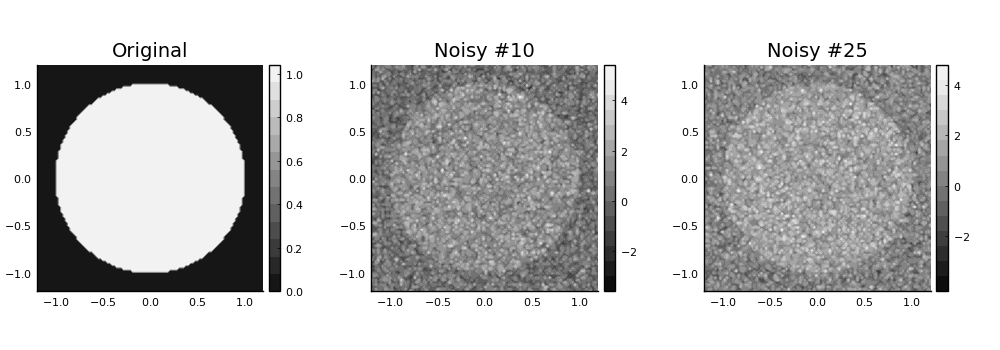

In [20]:
using Plots
pyplot(size=(1000,350))

n = 100 # size is (100, 100)
nb_images = 50
f(x,y) = 1 .*(x.^2 + y.^2 .<= 1)

x = range(-1.2, length=n, stop=1.2)
y = range(-1.2, length=n, stop=1.2)
Z = zeros(n, n, nb_images)

X = repeat(x', n, 1) # -1.2 ... 1.2
Y = repeat(y, 1, n) # -1.2 ; ... ; 1.2
Z0 = f.(X,Y) # Points that satisfy the condition of being inside the circle

for k = 1:nb_images
    Z[:,:,k] = Z0 + randn(n,n) # adding gaussian noise of std 1 and size (100, 100) to each image
end

original = contourf(X,Y,Z0[:,:], aspect_ratio=1, c=:grays, label="original")
one_noisy_figure = contourf(X,Y,Z[:,:,10], aspect_ratio=1, c=:grays, label="noisy1")
another_noisy_figure = contourf(X,Y,Z[:,:,25], aspect_ratio=1, c=:grays, label="noisy2")

plot(original, one_noisy_figure, another_noisy_figure, layout=(1,3), title=["Original" "Noisy #10" "Noisy #25"])

#### Question 2

A Singular Value Decomposition (SVD) could be used to get the main (greater) singular values, assuming that the rest are linked to noise components. In particular, in this scenario the first of them will correspond to $\sigma_S^2$ + $\sigma_W^2$ (signal + noise) and the following ones to $\sigma_W^2$ (just noise). A matrix $\hat{A}$ can be obtained using the first singular value and the columns of $U$ and $V$ associated to it.

#### Question 3



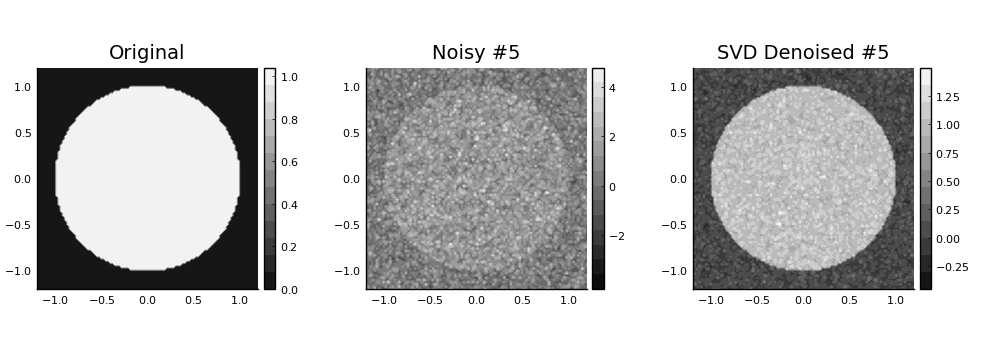

In [2]:
using LinearAlgebra: svd

A = reshape(Z, (n^2, nb_images))
svd_A = svd(A)

A_hat = svd_A.S[1] * svd_A.U[:,1] * svd_A.V[:,1]' # using only one SV gives the best result
A_hat = reshape(A_hat, (n, n, nb_images))

original = contourf(X,Y,Z0[:,:], aspect_ratio=1, c=:grays, label="original")
noisy = contourf(X,Y,Z[:,:,5], aspect_ratio=1, c=:grays, label="noisy")
denoised = contourf(X,Y,A_hat[:,:,5], aspect_ratio=1, c=:grays, label="denoised")
plot(original, noisy, denoised, layout=(1,3), title=["Original" "Noisy #5" "SVD Denoised #5"])

#### Question 4

In [3]:
using Statistics: mean,std

bias = mean(Z0 - A_hat[:,:,1]) # one image
MSE = mean((Z0 - A_hat[:,:,1]).^2)
variance = std(Z0 - A_hat[:,:,1])^2

bias, MSE, variance

(0.0006900457327745113, 0.019372113034834333, 0.01937357422914393)

#### Question 5

In [4]:
Z_mean = zeros(n, n)
for i=1:nb_images
    Z_mean += Z[:,:,i]/nb_images
end

bias = mean(Z0 - Z_mean) # mean image
MSE = mean((Z0 - Z_mean).^2)
variance = std(Z0 - Z_mean)^2

bias, MSE, variance

(-0.0024754367720214807, 0.019583323795331946, 0.019579153923512026)

#### Question 6

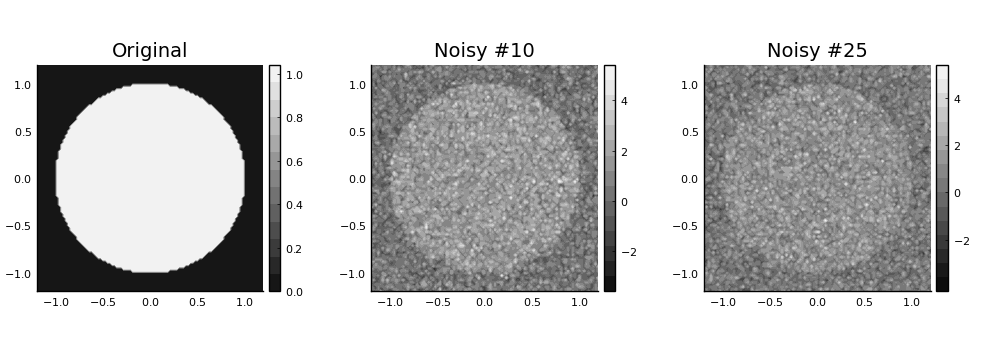

In [5]:
for k = 1:nb_images
    Z[:,:,k] = randn()*Z0 + randn(n,n)
end

original = contourf(X,Y,Z0, aspect_ratio=1, c=:grays, label="original")
one_noisy_figure = contourf(X,Y,Z[:,:,10], aspect_ratio=1, c=:grays, label="noisy1_mul")
another_noisy_figure = contourf(X,Y,Z[:,:,25], aspect_ratio=1, c=:grays, label="noisy2_mul")

plot(original, one_noisy_figure, another_noisy_figure, layout=(1,3), title=["Original" "Noisy #10" "Noisy #25"])

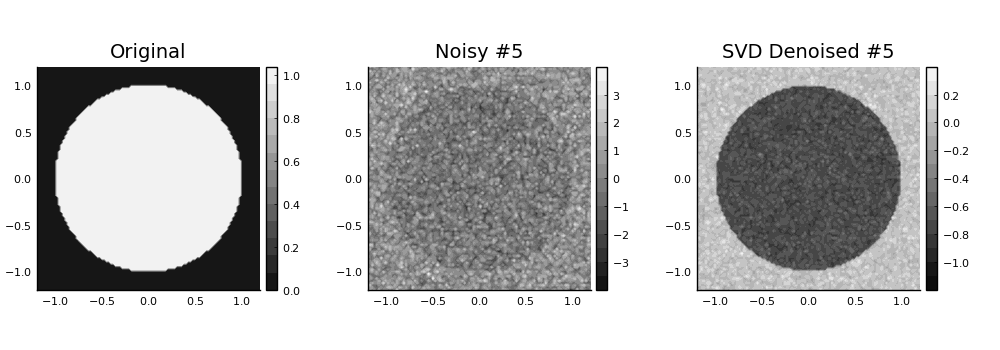

In [6]:
A = reshape(Z, (n^2, nb_images))
svd_A = svd(A)

A_hat = svd_A.S[1] * svd_A.U[:,1] * svd_A.V[:,1]'
A_hat = reshape(A_hat, (n, n, nb_images))

original = contourf(X,Y,Z0[:,:], aspect_ratio=1, c=:grays, label="original")
noisy = contourf(X,Y,Z[:,:,5], aspect_ratio=1, c=:grays, label="noisy_mul")
denoised = contourf(X,Y,A_hat[:,:,5], aspect_ratio=1, c=:grays, label="denoised_mul")
plot(original, noisy, denoised, layout=(1,3), title=["Original" "Noisy #5" "SVD Denoised #5"])

In this exercise it is necessary to normalize ($\alpha$ coefficient) the denoised images before computing the MSE as the amplitudes are variable. 

In [7]:
α          = sign(sum(A_hat[:,:,1].*Z0))*sqrt((mean([mean(Z[:,:,k].^2) for k=1:nb_images])-1)/mean(A_hat[:,:,1].^2)) 
αZ_est     = α*A_hat[:,:,1]
MSE_Z      = mean(sum((Z[:,:,k]-Z0).^2 for k=1:nb_images))/nb_images
MSE_αZ_est = mean((αZ_est-Z0).^2)
println("Mean Squared Error before SVD: $(round(MSE_Z, digits=3))")
println("Mean Squared Error after SVD: $(round(MSE_αZ_est, digits=3)) ")

bias = mean(Z0 - αZ_est) # one image after being denoised with SVD
variance = std(Z0 - αZ_est)^2

bias, variance

Mean Squared Error before SVD: 2.096
Mean Squared Error after SVD: 0.02 


(-0.024754443602124327, 0.019748803486882526)

In [8]:
Z_mean = zeros(n, n)
for i=1:nb_images
    Z_mean += Z[:,:,i]/nb_images
end

α          = sign(sum(Z_mean.*Z0))*sqrt((mean([mean(Z[:,:,k].^2) for k=1:nb_images])-1)/mean(Z_mean.^2)) 
αZ_est     = α*Z_mean
MSE_Z      = mean(sum((Z[:,:,k]-Z0).^2 for k=1:nb_images))/nb_images
MSE_αZ_est = mean((αZ_est-Z0).^2)
println("Mean Squared Error before average: $(round(MSE_Z, digits=3))")
println("Mean Squared Error after average: $(round(MSE_αZ_est, digits=3)) ")

bias = mean(Z0 - αZ_est) # mean image
variance = std(Z0 - αZ_est)^2

bias, variance

Mean Squared Error before average: 2.096
Mean Squared Error after average: 0.899 


(0.40631034868262916, 0.7335342731840989)

**Conclusion:** We can see that for exercises 1-5 both SVD and mean methods work. In this last case that is because the additive gaussian noise has $\mu = 0$, so it vanishes when computing the empirical mean. However, in exercise 6 a normal amplitude (of mean zero) is included, so the denoised images will have low pixel values in general and the method will not be useful. The MSE metric was used.

## II - Subspace based estimation

We consider a system that transmits a waveform. 
This waveform is reflected by a few reflectors 
and the signal is backpropagated towards the transmiter. 
The estimates of delays of backpropagated waves enable estimation of 
distances to the reflectors. We assume that the amplitude of reflectors fluctuates
and follow $\mathcal{N}(0,\sigma_k^2)$ distributions where $\sigma_k^2$ is the power of reflector $k$, with $k=1:K$ ($K$ is the total number of refectors). 

To get a good estimate of the distance to reflectors we assume $N$ independant realization of the experiment, leading to time sampled observations
$$
y_{n,t} = \sum_{k=1:K}\alpha_{n,k}s_{t-\tau_k} + w_t,n
$$
with $k=1:K$ the reflector index, $n=1:N$ the experiment index and $t=0:T-1$ the time index. $s_t$ is the transmitted waveform at $t$-th time index. For the sake of simplicity we assume that delays $\tau_k$ are integer multiples of the sampling period. 
We assume also that amplitudes $\alpha_{n,k}\sim \mathcal{N}(0,\sigma_k^2)$ are independant among experiments and reflectors and from the white observation noise $w_{t,n}$, with variance $\sigma_w^2$. Put in a vector form, experiment $n$ writes
$$
{\bf y}_n = \left[ {\bf s}_1,\ldots,{\bf s}_K\right]
\begin{pmatrix}
\alpha_{n,1} \\ \vdots \\ \alpha_{n,K}
\end{pmatrix}
= {\bf S}\boldsymbol{\alpha}_n
+ {\bf w}_n
$$
>- 1 - Plot the transmitted waveform, defined for $t=-10:10$ by 
$$
s(t) = (1- 2\left(\frac t 4\right)^2)\;\exp(-\left(\frac t 4\right)^2)
$$ 
and 0 elsewhere.
>- 2 - Generate $N=100$ experimental data vectors ${\bf Y} =[{\bf y}_1,\ldots, {\bf y}_N]$ of length $T=50$ with $K=3$ reflectors that correspond to delays $\tau_1,\tau_2,\tau_3 = 12,25,35$ and variances of reflected amplitudes $\sigma_1^2,\sigma_2^2,\sigma_3^2 = 3,2,1$. In addition, we assume that $\sigma_w^2=1$.
>- 3 - Compute the data covariance matrix
>- 4 - Use the subspace method presented in the lesson to estimate the time delays. 
>- 5 - Assuming an acoustic sensor and sound propagation speed, $v=300ms^{-1}$, for sampling period $\delta= 1ms$  what are the estimated distances to the three reflectors (in meters).

#### Question 1

In [9]:
# Initialization

tau = [12, 25, 35]
v = 300

s(t) = (1 .-2 .*(t./4).^2) .* exp.(-(t./4).^2) .*(t .<= 10).*(t .>= -10)
S(t) = [s(t.-tau[1]), s(t.-tau[2]), s(t.-tau[3])]

S (generic function with 1 method)

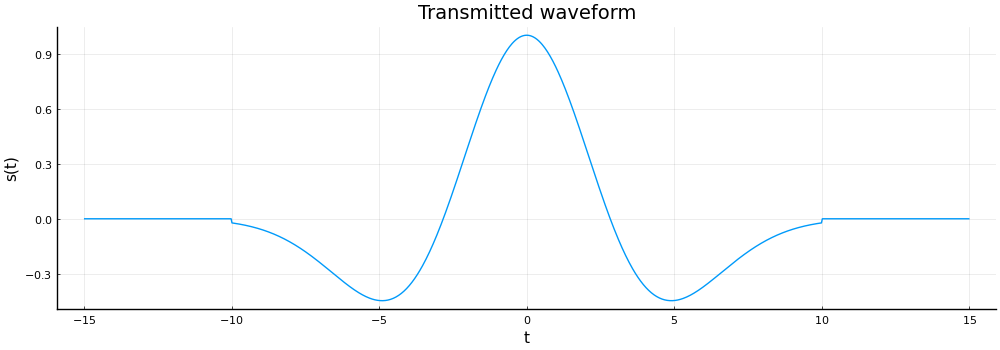

In [10]:
using Plots

t = range(-15, stop=15, length=1000)
plot(t, s(t), title="Transmitted waveform", legend=false)
ylabel!("s(t)")
xlabel!("t")


#### Question 2


In [11]:
using Distributions

N = 100
T = 50
t = range(0, stop=T-1, length=50)
K = 3

sigma_w = 1
sigma_alpha = [3 2 1]
alpha = rand(MvNormal([0, 0, 0], [sigma_alpha[1] 0 0; 0 sigma_alpha[2] 0; 0 0 sigma_alpha[3]]), N)
noise = rand(Normal(0, sigma_w), (N, length(t)))
y = zeros(N, length(t))

for k = 1:N
    y[k,:] = (S(t)'*alpha)[k] + noise[k,:]'
end

#### Question 3



In [12]:
Ry = y'*y/N

50×50 Matrix{Float64}:
  0.997522    0.0143144   0.0301543   …  -0.0407394    0.0214985
  0.0143144   1.08232     0.0484289       0.240385     0.0719384
  0.0301543   0.0484289   1.01551         0.123093    -0.00172742
  0.0576647  -0.162276   -0.133336       -0.106814    -0.0264103
  0.194943   -0.0131466   0.0698142      -0.103188    -0.0704004
 -0.0340454   0.0823112  -0.0566018   …   0.127991     0.0380863
  0.265148    0.0376457   0.0818242       0.0299594   -0.158038
  0.13424     0.149795   -0.0555883      -0.0453263   -0.250513
  0.140523   -0.143287    0.0292676      -0.092403    -0.151294
  0.183574    0.0208911  -0.0731977       0.0271726   -0.0850172
 -0.133713   -0.0106075   0.0750657   …  -0.0823597    0.0295499
 -0.379611   -0.0888232  -0.172031       -0.00892562   0.285092
 -0.454497   -0.0219439   0.0725062      -0.0713641    0.337999
  ⋮                                   ⋱               
  0.063039    0.069906    0.0425679       0.0480218   -0.0645566
 -0.0193791   0.

#### Question 4



In [13]:
using LinearAlgebra: eigvecs, eigvals

U = eigvecs(Ry)
lambda = eigvals(Ry)

U

50×50 Matrix{Float64}:
  0.0444114   -0.345383   -0.0981384  -0.13218    …  -0.0538452   -0.0510605
  0.106884    -0.0442217   0.128984    0.248288      -0.0246319   -0.00366774
  0.148089    -0.0456708  -0.0688958  -0.0424842     -0.0845874    0.00208826
  0.111403     0.0944249   0.155679   -0.133484       0.0271409   -0.0473078
 -0.077634     0.0987951  -0.263117   -0.028837      -0.0155902   -0.104732
 -0.00674532  -0.29995    -0.235604   -0.0130195  …   0.00956342  -0.096444
  0.0604068    0.0434625   0.034129   -0.0271439      0.039588    -0.21547
 -0.0860719    0.0487594  -0.0873762  -0.166897      -0.118262    -0.215042
 -0.0106807   -0.102526    0.112612   -0.0296509     -0.178085    -0.19912
 -0.255886     0.115479   -0.0124112   0.292751      -0.0828259   -0.0231552
 -0.148477    -0.017952    0.018127    0.119409   …  -0.0118768    0.186986
  0.00922412  -0.240799   -0.183781    0.103769       0.0790531    0.399005
 -0.126975     0.0608531  -0.147291   -0.0735436      0.1179

In [14]:
lambda

50-element Vector{Float64}:
  0.10225406088554903
  0.11700999068782866
  0.1665153665893477
  0.17114165824393043
  0.18524712669291868
  0.2112659276029304
  0.24981440594097062
  0.25604702996507667
  0.3024017387532988
  0.3417590902426996
  0.35468129591592085
  0.3981987815554669
  0.4067556120368832
  ⋮
  1.7225483852286188
  1.7774692759799116
  1.8000357846688682
  1.9695520713500763
  2.050910993810919
  2.1389730757356595
  2.2004898520906826
  2.4746844671012105
  2.500126672263805
  5.508029812834367
  8.745554756884268
 16.38636063898396

I extract the $T-K$ columns of $U$ that correspond to the lowest eigenvalues.

In [15]:
U = U[:,1:T-K]

50×47 Matrix{Float64}:
  0.0444114   -0.345383   -0.0981384  -0.13218    …   0.17105      0.165852
  0.106884    -0.0442217   0.128984    0.248288       0.0147445    0.086399
  0.148089    -0.0456708  -0.0688958  -0.0424842      0.117224    -0.152421
  0.111403     0.0944249   0.155679   -0.133484      -0.00551672   0.210511
 -0.077634     0.0987951  -0.263117   -0.028837       0.0620415   -0.119287
 -0.00674532  -0.29995    -0.235604   -0.0130195  …  -0.00377062  -0.0581615
  0.0604068    0.0434625   0.034129   -0.0271439      0.135014     0.103113
 -0.0860719    0.0487594  -0.0873762  -0.166897      -0.324531     0.13962
 -0.0106807   -0.102526    0.112612   -0.0296509     -0.144768    -0.0682998
 -0.255886     0.115479   -0.0124112   0.292751       0.0351891   -0.0482525
 -0.148477    -0.017952    0.018127    0.119409   …  -0.201691    -0.0256651
  0.00922412  -0.240799   -0.183781    0.103769      -0.042644     0.266682
 -0.126975     0.0608531  -0.147291   -0.0735436      0.086753

In [16]:
using Optim

f(tau_e) = sum((U'*[s(t.-tau_e[1]) s(t.-tau_e[2]) s(t.-tau_e[3])]).^2) # negative values are not possible

lower = [0.0, 0.0, 0.0]
upper = [50.0, 50.0, 50.0]
initial_x = [10.0, 25.0, 35.0]
res = optimize(tau_e -> f([tau_e[1] tau_e[2] tau_e[3]]), lower, upper, initial_x)
tau_est = res.minimizer

tau_est, res.minimum

([12.000072665893455, 25.036913924253863, 35.018946352793996], 0.7192043605928152)

Note: initial values for the *Optim.optimize* function are chosen to be close to the real delays. That is because there are several local minima of $f$. By inspection I have obtained that this result is the global minimum as well, but using *Peaks.jl* and/or performing the complete analysis of the function would give a more detailed reasoning. 

#### Question 5

In [17]:
delta_t = 10^-3

dist_est = round.(tau_est*delta_t*v/2; digits=3) # round-trip
dist = round.(tau*delta_t*v/2; digits=3) # round-trip

MSE = mean((dist_est - dist).^2)
println("The estimated distances (in meters): $(round(dist_est[1],digits=3)), $(round(dist_est[2],digits=3)), $(round(dist_est[3],digits=3))")
println("The real distances (in meters): $(round(dist[1],digits=3)), $(round(dist[2],digits=3)), $(round(dist[3],digits=3))")
println("The Mean Squared Error (MSE): $(round.(MSE; digits=7))") 

The estimated distances (in meters): 1.8, 3.756, 5.253
The real distances (in meters): 1.8, 3.75, 5.25
The Mean Squared Error (MSE): 1.5e-5
